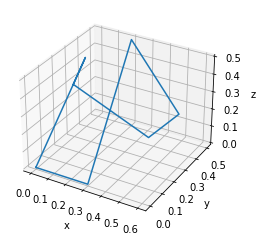

Surface Area of minimum tringulated graph : 0.7625142155714066


In [6]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

phi = (1.0 + sqrt(5.0))/2.0


def armijo_step(X, d, prev_val, gamma, bita, epsilon):
    
    x1 = bita - ((phi - 1)*(bita - gamma))
    x2 = gamma + ((phi - 1)*(bita - gamma))
    val = x1
    
    param2 = X - np.dot(x2, d)
    param2 = param2.tolist()
    
    param1 = X - np.dot(x1, d)
    param1 = param1.tolist()
    
    if equation(param2) < equation(param1):
        if x1 > x2:
            bita = x1
        else:
            gamma = x1

    else:
        if x2 > x1:
            bita = x2
        else:
            gamma = x2

    if abs(prev_val - val) <= epsilon:
        return val
    else:
        return armijo_step(X, d, val, gamma, bita, epsilon)



def gradient(f, X):
    h = 0.0000001
    delf = []
    
    for i in range(len(X)):
        E = np.zeros(len(X))
        E[i] = h
        vals = X + E
        delf.append((f(vals) - f(X))/h)
            
    return delf


def difference(X, Y):
    total = 0
    
    for i in range(len(X)):
        total = total + abs(X[i] - Y[i])
    total = total / len(X)
    

    return total


def steepest_descent(X, epsilon):
    
    while True:
        d = gradient(equation, X)
        x_prev = X
     
        step_length = armijo_step(X, d, 1, -10, 10, 0.1)
        X = X - np.dot(step_length, d)
        X = X.tolist()
        
        if difference(x_prev, X) < epsilon:
            return x_prev
        
        
    return x_prev

def Boundary(bc):
    return (0.5-np.abs(bc-0.5))

x=np.array([0,0,0,0.5,0.6,0.2,0.3,0.2,0])
y=np.array([0,0.4,0.3,0.2,0.3,0.5,0,0,0])
z = Boundary(y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()


def equation(x):
    
    return (x[0]-2)**2 + (2*x[1]-3)**2 + x[2]**2
    
a= steepest_descent([5,6,7], 0.1)
surface_area = a[0]*a[1]*a[2]
print("Surface Area of minimum tringulated graph :", surface_area)
